# DLCV Assignment 1

**Due Date: 17/02/2023 11:59PM IST**

**Name:Puspa Sahu**

**Sr. No.: 21676**


In this assignment, we will cover the following topics:

1) Training a simple Linear Model 

2) Implementing Modules with Backprop functionality

3) Implementing Convolution Module on Numpy


It is crucial to get down to the nitty gritty of the code to implement all of these. No external packages (like caffe,pytorch etc), which directly give functions for these steps, are to be used. 

# Training a simple Linear Model

In this section, you will write the code to train a Linear Model. The goal is to classify an input $X_i$ of size $n$ into one of $m$ classes. For this, you need to consider the following:

1)  **Weight Matrix** $W_{n\times m}$: The Weights are multipled with the input $X_i$ (vector of size $n$), to find $m$ scores $S_m$ for the $m$ classes.

2)  **The Loss function**:   
  * The Cross Entropy Loss: By interpreting the scores as unnormalized log probabilities for each class, this loss tries to measure dissatisfaction with the scores in terms of the log probability of the right class:

$$
L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}
$$

where $f_{ y_i }$ is the $y_i$-th element of the output of $W^T  X_i$

3) **A Regularization term**: In addition to the loss, you need a Regularization term to lead to a more distributed (in case of $L_2$) or sparse (in case of $L_1$) learning of the weights. For example, with $L_2$ regularization, the loss has the following additional term:

$$
R(W) = \sum_k\sum_l W_{k,l}^2  
$$

Thus the total loss has the form:
$$
L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\
$$

4) **An Optimization Procedure**: This refers to the process which tweaks the weight Matrix $W_{n\times m}$ to reduce the loss function $L$. In our case, this refers to Mini-batch Gradient Descent algorithm. We adjust the weights $W_{n\times m}$, based on the gradient of the loss $L$ w.r.t. $W_{n\times m}$. This leads to:
$$
W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W},
$$
where $\alpha$ is the learning rate. Additionally, with "mini-batch" gradient descent, instead of finding loss over the whole dataset, we use a small sample $B$ of the training data to make each learning step. Hence,
$$
W_{t+1} = W_{t} - \alpha \frac{\partial \sum_{i \in B}{L_{x_i}}}{\partial W},
$$
where $|B|$ is the batch size.

# Question 1

Train a **Single-Layer Classifier** for the MNIST dataset. 
* Use Softmax-Loss.
* Maintain a train-validation split of the original training set for finding the right value of $\lambda$ for the regularization, and to check for over-fitting.
* Finally, evaluate the classification performance on the test-set.


(60000, 784)
(60000,)
(10000, 784)
(10000,)


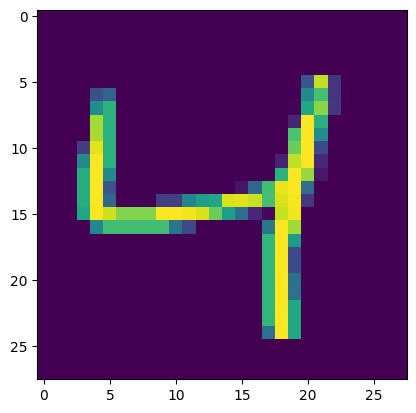

In [10]:
import struct
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np



with open('trainimagemnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    train_image = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_image = train_image.reshape((size,-1))
    plt.imshow(train_image[2].reshape((28,28)))
    print(train_image.shape)
    
with open('trainlabelmnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    train_label=np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(train_label.shape)    
with open('testimagemnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    test_image = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_image = test_image.reshape((size,-1))
    print(test_image.shape)    
with open('testlabelmnist','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    test_label=np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(test_label.shape)

In [11]:
# Define the class for a Single Layer Classifier
class Single_layer_classifier():
    
    def __init__(self, input_size, output_size):
        
        ## WRITE CODE HERE
        self.input_size=input_size
        self.output_size=output_size
        self.int_var=0.01
        self.lmda=0.1
        self.weights=np.random.normal(0,self.int_var,size=(input_size,output_size))
        self.learning_parameter=0.00001
        
        # Give the instance a weight matrix, initialized randomly
        # One possible strategy for a good initialization is Normal (0, σ) where σ = 1e-3.
        # Try experimenting with different values of σ.
        
    # Define the forward function
    def forward(self, input_x):
        
        input_x=input_x.reshape((784,1))
        
        scores=np.dot(self.weights.T,input_x)
        
        #standardising
        #scores=scores-min(scores)/(max(scores)-min(scores))
        scores=scores-np.mean(scores)/np.std(scores)
        return scores
    
    # Similarly a backward function
    # we define 2 backward functions (as Loss = L_data + L_reg, grad(Loss) = grad(L1) + grad(L2))
    
    def backward_Ldata(self, grad_from_loss,input_x):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the loss w.r.t. the corresponding element of W
        
        input_x=input_x.reshape((784,1))
        
        grad_from_loss=grad_from_loss.reshape((10,1))
       
        grad_matrix=np.matmul(input_x,grad_from_loss.T)
        
        
        return grad_matrix
        
    def backward_Lreg(self):
        
        # this function returns a matrix of the same size as the weights, 
        # where each element is the partial derivative of the regularization-term
        # w.r.t. the corresponding element of W
        
        ## WRITE CODE HERE
        
        grad_matrix=2*self.weights
        #print(grad_matrix.shape)
        
        return grad_matrix
    def backward(self,grad_mat1,grad_mat2):
        
        self.weights=self.weights - self.learning_parameter*(grad_mat1+self.lmda*grad_mat2)
        

In [12]:

def loss_function(input_y,scores):

    sm=np.exp(scores)/(sum(np.exp(scores)))

    loss= -1*math.log(sm[input_y])
    

    return loss


def loss_backward(loss,scores,input_y):
    # This part deals with the gradient of the loss w.r.t the output of network
    # for example, in case of softmax loss(-log(q_c)), this part gives grad(loss) w.r.t. q_c
    # pass this to backward_ldata

    
    one_hot=np.zeros((10,1))
    one_hot[input_y]=1
    x=np.exp(scores)/sum(np.exp(scores))
    
    
    grad_from_loss=np.subtract(x,one_hot)
    
    

    return grad_from_loss
        

### Create utility functions for calculating training and validation accuracy

In [13]:
## Load The Mnist data:
# Download data from http://yann.lecun.com/exdb/mnist/
# load the data.

# maintain a train-val split

# Now, write a generator that yields (random) mini-batches of the input data
# Do not use same set of mini-batches for different epochs
    
def get_minibatch(training_x=train_image, training_y=train_label,batch_size=64):
    indexes=np.arange(train_image.shape[0])
    np.random.shuffle(indexes)
    for i in range(0,len(indexes),batch_size):
        mini_x=train_image[indexes[i:i+batch_size]]
        mini_y=train_label[indexes[i:i+batch_size]]
        yield mini_x,mini_y

800
0.6789805245243729


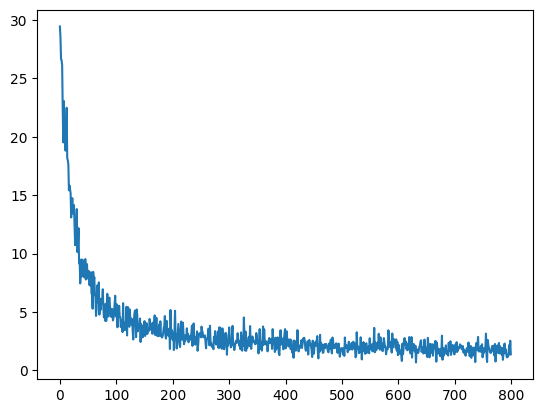

In [14]:
# Finally the trainer:
# Make an instance of Single_layer_classifier
# Train for t epochs:
###  Train on the train-set obtained from train-validation split
###  Use the mini-batch generator to get each mini-batch

batch_size=150
obj=Single_layer_classifier(784,10)
max_epochs=2
min_loss=math.inf
batch_loss=[]
for j in range(max_epochs):
    minibatch=get_minibatch(train_image,train_label,batch_size)

    for batch_id,(input_x , input_y) in enumerate(minibatch):
        loss=0
        cur_loss=0
        grad_mat=np.zeros((784,10))
        for i in range(batch_size):
            score=obj.forward(input_x[i])
            cur_loss=loss_function(input_y[i],score)
            
            loss+=cur_loss
            grad_loss=loss_backward(cur_loss,score,input_y[i])
            grad_mat+=((obj.backward_Ldata(grad_loss,input_x[i]))/batch_size)

            
        grad_mat2=obj.backward_Lreg()
        obj.backward(grad_mat,grad_mat2)

        min_loss=min(min_loss,loss/batch_size)
        batch_loss.append(loss/batch_size)

        
print(len(batch_loss))
plt.plot(batch_loss) 

print(min_loss)

        

In [15]:
def final_report():
    n=len(train_image)
    s=0
    for i in range(n):
        score=obj.forward(train_image[i])
        yred=np.argmax(score)
        s+=(yred==train_label[i])
    print(f"train accuracy: {s/n}")
    n=len(test_image)
    s=0
    for i in range(n):
        score=obj.forward(test_image[i])
        yred=np.argmax(score)
        s+=(yred==test_label[i])
    print(f"test accuracy: {s/n}")
        
final_report()

train accuracy: 0.835
test accuracy: 0.8452


### Find the accuracy on the validation set

In [9]:
# WRITE CODE HERE

In [344]:
# The next step is to find the optimal value for lambda, number of epochs, learning rate and batch size. 
# CHOSE ANY TWO from the above mentioned to tune.
# Create plot and table to show the effect of the hparams.

### Report final performance on MNIST test set

In [345]:
# WRITE CODE HERE

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE

# Training a Linear Classifier on MNIST from scikit-learn

In this section you have to train a linear classifier from the scikit-learn library and compare its results against your implementation.
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
    # WRITE CODE HERE 

### Compare the training and test accuracies for the your implementation and linear classifier from scikit-learn

In [ ]:
    # WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE

# Implementing Backpropagation

Now that you have had some experience with single layer networks, we can proceed to more complex architectures. But first we need to completely understand and implement backpropagation.

## Backpropagation:

Simply put, a way of computing gradients of expressions through repeated application of chain rule. If
$$
L = f (g (h (\textbf{x})))
$$
then, by the chain rule we have:
$$
\frac{\partial L}{\partial \textbf{x}} = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial \textbf{x}} 
$$

** Look into the class Lecture for more detail **



# Question 2 : Scalar Backpropagation

Evaluate the gradient of the following function w.r.t. the input:

$$ f(x,y,z) =  log(\sigma(\frac{cos(\pi \times x)+sin(\pi \times y/2)}{tanh(z^2)}))$$
where $\sigma$ is the sigmoid function. Find gradient for the following inputs:
  * $(x,y,z)$ =  (2,4,1)
  * $(x,y,z)$ =  (9,14,3)
  * $(x,y,z)$ =  (128,42,666)
  * $(x,y,z)$ =  (52,14,28)

      

In [ ]:
# To solve this problem, construct the computational graph
# Write a class with forward and backward functions, for each node if you like
# For eg:

class Sigmoid():
    def __init__(self):
        
    def forward():
        # save values useful for backpropagation
    def backward():
        
# CAUTION: Carefully treat the input and output dimension variation. At worst, handle them with if statements.

In [ ]:
# Now write the class func
# which constructs the graph (all operators), forward and backward functions.

class Func():
    def __init__(self):
        # construct the graph here
        # assign the instances of function modules to self.var
        
    def forward(x,y,z):
        # Using the graph element's forward functions, get the output. 
        
        return output
    
    def backward(output):
        # Use the saved outputs of each module, and backward() function calls
        
        return [grad_x,grad_y,grad_z]
    

## Question 3 : Modular Vector Backpropagation

* Construct a Linear Layer module, implementing the forward and backward functions for arbitrary sizes.
* Construct a ReLU module, implementing the forward and backward functions for arbitrary sizes.
* Create a 2 layer MLP using the constructed modules.

* Modifying the functions built in Question 1 , train this two layer MLP for the same data set, MNIST, with the same train-val split.

### Plot the training loss and training accuracy plot

In [ ]:
# Use the same utility functions defined in the previous question
# WRITE CODE HERE

### Find the accuracy on the validation set

In [ ]:
# WRITE CODE HERE

In [ ]:
# Find the optimal value of learning rate and batch size. 
# Use the same tuning strategy as the previous question
# Create plot and table to show the effect of the hparams.

### Report final performance on MNIST test set

In [ ]:
# WRITE CODE HERE

### Find the best performing class and the worst performing class

In [ ]:
# WRITE CODE HERE

### Any additional observations / comments?

## BONUS Question
### Observe the effect on test set accuracy by changing the number of training samples.
### Train on 10%, 20% and 50% training data and plot the percentage of training data v.s. the test accuracy.  

In [ ]:
# WRITE CODE HERE


# Implementing a Convolution Module with Numpy

* This topic will require you to implement the Convolution operation using Numpy.
* We will use the Module for tasks like Blurring.
* Finally, we implement Backpropagation for the convolution module.


## Question 4

* Implement a naive Convolution module, with basic functionalities: kernel_size, padding, stride and dilation
  
* Test out the convolution layer by using it to do gaussian blurring on 10 random images of CIFAR-10 dataset


In [ ]:
## Define a class Convolution Layer, which is initialized with the various required params:
class Convolution_Layer():
    
    def __init__(self,input , filter_size, bias=True, stride=1, padding=0, dilation=1):
        # For an untrained layer, set random initial filter weights

    def forward(self,input):
        # Input Proprocess(According to pad etc.) Input will be of size (Batch_size, in_channels, inp_height, inp_width)
        
        # Reminder: Save Input for backward-prop
        # Simple Conv operation:
        # Loop over every location in inp_height * inp_width for the whole batch
        
        # Output will be of the size (Batch_size, out_channels, out_height, out_width)
        return output
    
    def backward(self, grad_of_output_size):
        
        # Naive Implementation
        # Speed is not a concern
        # Hint: gradients from each independant operation can be summed
        
        #  return gradient of the size of the weight kernel
        return grad
    
    def set_weights(self, new_weights):
        ## Replace the set of weights with the given 'new_weights'
        ## use this for setting weights for blurring, bilateral filtering etc. 
    

### Download CIFAR-10 images and load it in a numpy array (https://www.cs.toronto.edu/~kriz/cifar.html)



In [ ]:
# WRITE CODE HERE

### Initialize a conv layer. Set weights for gaussian blurring (do not train the filter for this part). Visualise the filters using matplotlib


In [ ]:
# WRITE CODE HERE

### Generate output for the first 5 images of the training set

In [ ]:
# WRITE CODE HERE

### Use matplotlib to show the input and corresponding blurred output

In [ ]:
# WRITE CODE HERE

## Question 5
<br>
Now we will use this module for training a simple Convolution Layer using CIFAR-10 images. 

* The goal is to learn a set of weights, by using the backpropagation function created. To test the backpropagation, instead of training a whole network, we will train only a single layer.
  * Instantiate a Convolution  layer $C_0$ with 20 filters, each with size 5$\times$5 (RGB image, so 3 input channels). Load the given numpy array of size (20,3,5,5), which represents the weights of a convolution layer. Set the given values as the filter weights for $C_0$. Take 100 CIFAR-10 images. Save the output of these 100 images generated from this Convolution layer $C_0$. 
  
  * Now, initialize a new convolution layer $C$ with weight values sampled from uniform distribution [-1,1]. Use the $L_2$ loss between the output of this layer $C$ and the output generated in the previous step to learn the filter weights of $C_0$.


In [ ]:
## Load filter weights from given numpy array "C0_weights.npy".
## Init a conv layer C_0 with these given weights

## For all images get output. Store in numpy array.



In [ ]:
# for part 2 we need to write a class for the  L2 loss
class L2_loss():
    def ___init__(self):
    
    def forward(self, C0_output,C_output):
        # Conv. output is of dimension (batchsize,channels,height,width)
        # calculate the L2 norm of (C0_output - C_output)
        
        return loss
    
    def backward(self,output_grad):
        # from the loss, and the conv. output, get the grad at each location
        # The grad is of the shape (batchsize,channels,height,width)
        return grad

# Now Init a new conv layer C and a L2 loss layer

# Train the new conv-layer C using the L2 loss to learn C_0, i.e., the set of given weights.
# Use mini-batches if required


# Print L2 dist between output from the new trained convolution layer C and the outputs generated from C_0.
